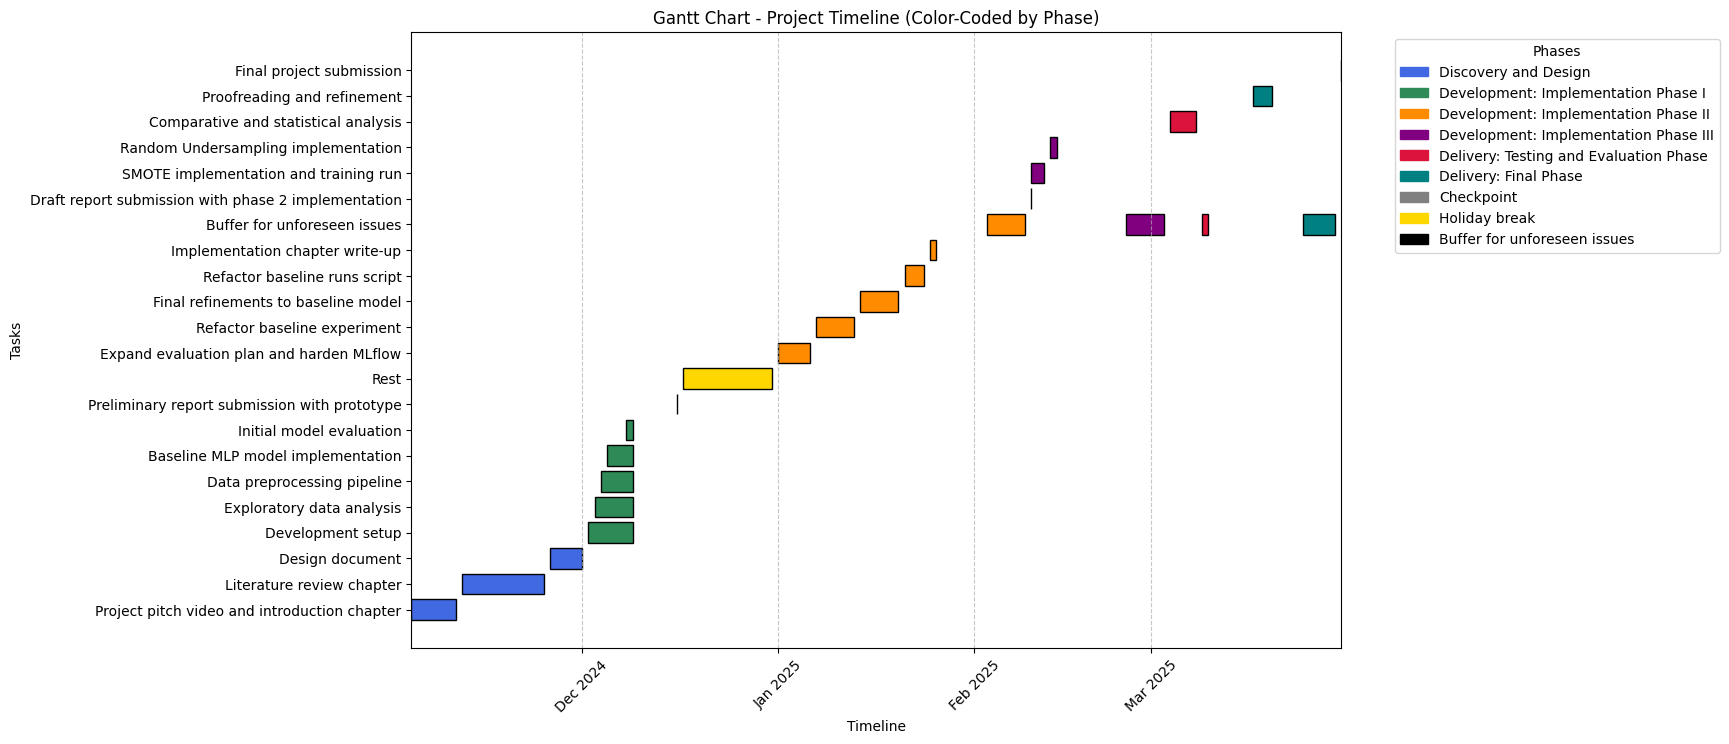

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define project data
data = [
    ["Discovery and Design", "Project pitch video and introduction chapter", "2024-11-04", "2024-11-11"],
    ["Discovery and Design", "Literature review chapter", "2024-11-12", "2024-11-25"],
    ["Discovery and Design", "Design document", "2024-11-26", "2024-12-01"],
    ["Development: Implementation Phase I", "Development setup", "2024-12-02", "2024-12-09"],
    ["Development: Implementation Phase I", "Exploratory data analysis", "2024-12-03", "2024-12-09"],
    ["Development: Implementation Phase I", "Data preprocessing pipeline", "2024-12-04", "2024-12-09"],
    ["Development: Implementation Phase I", "Baseline MLP model implementation", "2024-12-05", "2024-12-09"],
    ["Development: Implementation Phase I", "Initial model evaluation", "2024-12-08", "2024-12-09"],
    ["Checkpoint", "Preliminary report submission with prototype", "2024-12-16", "2024-12-16"],
    ["Holiday break", "Rest", "2024-12-17", "2024-12-31"],
    ["Development: Implementation Phase II", "Expand evaluation plan and harden MLflow", "2025-01-01", "2025-01-06"],
    ["Development: Implementation Phase II", "Refactor baseline experiment", "2025-01-07", "2025-01-13"],
    ["Development: Implementation Phase II", "Final refinements to baseline model", "2025-01-14", "2025-01-20"],
    ["Development: Implementation Phase II", "Refactor baseline runs script", "2025-01-21", "2025-01-24"],
    ["Development: Implementation Phase II", "Implementation chapter write-up", "2025-01-25", "2025-01-26"],
    ["Development: Implementation Phase II", "Buffer for unforeseen issues", "2025-02-03", "2025-02-09"],
    ["Checkpoint", "Draft report submission with phase 2 implementation", "2025-02-10", "2025-02-10"],
    ["Development: Implementation Phase III", "SMOTE implementation and training run", "2025-02-10", "2025-02-12"],
    ["Development: Implementation Phase III", "Random Undersampling implementation", "2025-02-13", "2025-02-14"],
    ["Development: Implementation Phase III", "Buffer for unforeseen issues", "2025-02-25", "2025-03-03"],
    ["Delivery: Testing and Evaluation Phase", "Comparative and statistical analysis", "2025-03-04", "2025-03-08"],
    ["Delivery: Testing and Evaluation Phase", "Buffer for unforeseen issues", "2025-03-09", "2025-03-10"],
    ["Delivery: Final Phase", "Proofreading and refinement", "2025-03-17", "2025-03-20"],
    ["Delivery: Final Phase", "Buffer for unforeseen issues", "2025-03-25", "2025-03-30"],
    ["Checkpoint", "Final project submission", "2025-03-31", "2025-03-31"]
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Phase", "Task", "Start Date", "End Date"])
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["End Date"] = pd.to_datetime(df["End Date"])
df["Duration"] = (df["End Date"] - df["Start Date"]).dt.days

# Define colors for each phase
phase_colors = {
    "Discovery and Design": "royalblue",
    "Development: Implementation Phase I": "seagreen",
    "Development: Implementation Phase II": "darkorange",
    "Development: Implementation Phase III": "purple",
    "Delivery: Testing and Evaluation Phase": "crimson",
    "Delivery: Final Phase": "teal",
    "Checkpoint": "gray",
    "Holiday break": "gold",
    "Buffer for unforeseen issues": "black"
}

# Assign colors based on phase
df["Color"] = df["Phase"].map(lambda x: "black" if "Buffer" in x else phase_colors.get(x, "gray"))

# Plot Gantt Chart
fig, ax = plt.subplots(figsize=(12, 8))
for _, row in df.iterrows():
    ax.barh(row["Task"], row["Duration"], left=mdates.date2num(row["Start Date"]), 
            color=row["Color"], edgecolor="black")

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Add labels
plt.xlabel("Timeline")
plt.ylabel("Tasks")
plt.title("Gantt Chart - Project Timeline (Color-Coded by Phase)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Create legend
legend_labels = {v: k for k, v in phase_colors.items()}
handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.show()
